# 1 - Importar libs e carregar os DataFrames

In [43]:
from bibliotecas.eda import *
from bibliotecas.limpeza import *

In [44]:
import missingno as msno
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import geobr

import time
from datetime import datetime
from datetime import timedelta
%matplotlib inline

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# preprocessing and pipeline
from sklearn.preprocessing import (StandardScaler,  # REESCALANDO FEATURES
                                   MinMaxScaler, 
                                   RobustScaler, 
                                   LabelEncoder)
from sklearn.pipeline import Pipeline # CRIANDO PIPELINES
from sklearn import set_config


# feature selection
from sklearn.feature_selection import SelectKBest, chi2, RFE  # SELEÇÃO DE FEATURES
from sklearn.ensemble import RandomForestClassifier

# mode selection and metrics
from sklearn.model_selection import (train_test_split,  # METRICAS
                                     GridSearchCV,
                                     KFold,
                                     cross_val_score)
from sklearn import metrics

from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             precision_score, 
                             recall_score,
                             confusion_matrix,
                             roc_auc_score,
                             roc_curve
                            )

# warnings option
import warnings
warnings.filterwarnings('ignore')

# 2 - Lendo Arquivos

In [13]:
df_nonan = pd.read_pickle('dados/df_nonan.pkl')
df_municipios = pd.read_csv('dados/Codigo_Nome_Municipios.txt', encoding ='ANSI', sep=';')
df_coordenadas = pd.read_csv('dados/Sedes_Coordenadas_Municipios.csv', encoding ='utf8', delimiter=";")

# 3 - EDA

In [5]:
target = 'obito'
disc_cols = ['cs_sexo', 'nome_munic', 
             'codigo_ibge','asma', 'cardiopatia',
             'diabetes','doenca_hematologica', 'doenca_hepatica',
             'doenca_neurologica','doenca_renal', 'imunodepressao',
             'obesidade','outros_fatores_de_risco', 'pneumopatia',
             'puerpera','sindrome_de_down']
cont_cols = ['idade', 'ano_inicio_sintomas', 'mes_inicio_sintomas', 'ano_mes_inicio_sintomas']

In [7]:
EDA_values(df_nonan)


  0 | nome_munic               |  Min: Adamantina | Max: Óleo
  1 | codigo_ibge              |  Min: 3500105 | Max: 3599999
  2 | idade                    |  Min: 0.0 | Max: 110.0
  3 | cs_sexo                  |  ['MASCULINO' 'FEMININO']
  4 | diagnostico_covid19      |  ['CONFIRMADO']
  5 | data_inicio_sintomas     |  Min: 2020-02-04T00:00:00Z | Max: 2021-11-05T00:00:00Z
  6 | obito                    |  [0 1]
  7 | asma                     |  ['IGNORADO' 'NÃO' 'SIM']
  8 | cardiopatia              |  ['IGNORADO' 'SIM' 'NÃO']
  9 | diabetes                 |  ['IGNORADO' 'NÃO' 'SIM']
 10 | doenca_hematologica      |  ['IGNORADO' 'NÃO' 'SIM']
 11 | doenca_hepatica          |  ['IGNORADO' 'NÃO' 'SIM']
 12 | doenca_neurologica       |  ['IGNORADO' 'NÃO' 'SIM']
 13 | doenca_renal             |  ['IGNORADO' 'NÃO' 'SIM']
 14 | imunodepressao           |  ['IGNORADO' 'NÃO' 'SIM']
 15 | obesidade                |  ['IGNORADO' 'NÃO' 'SIM']
 16 | outros_fatores_de_risco  |  ['IGNORADO' 'NÃO' 

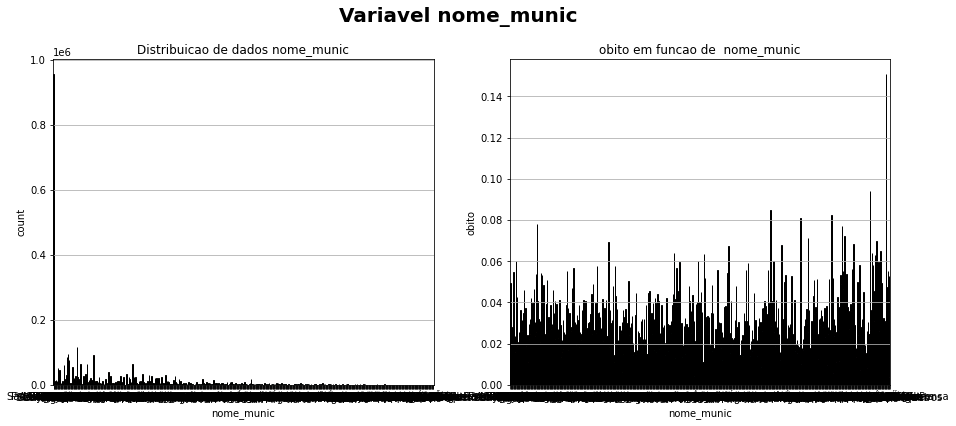

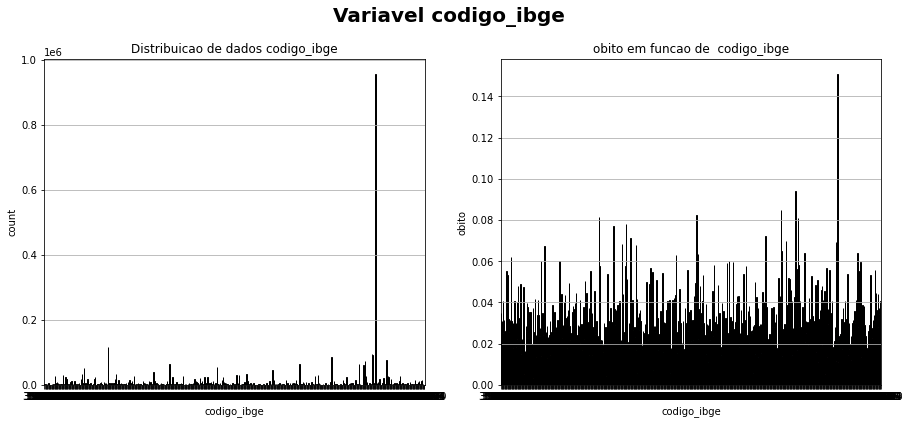

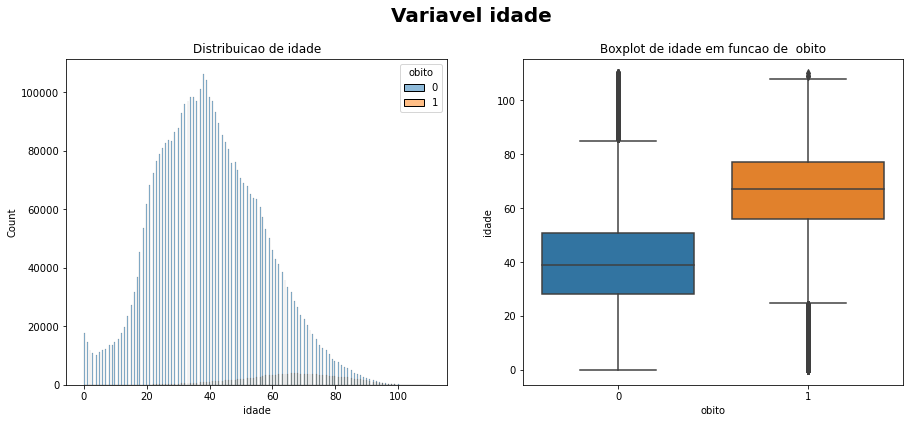

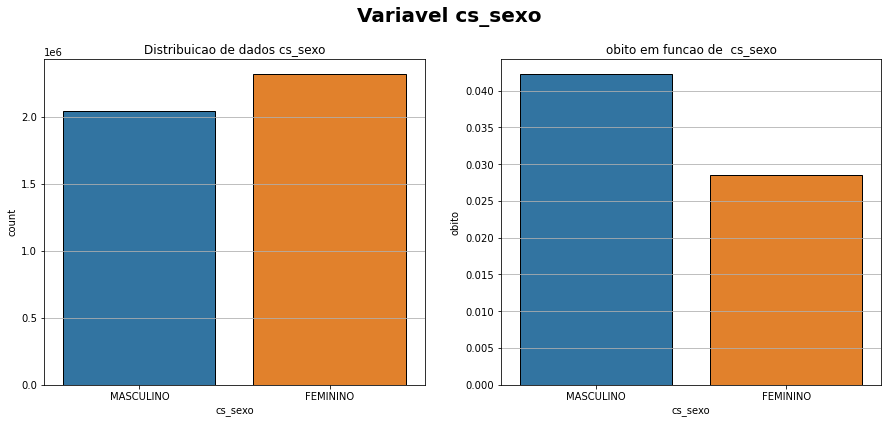

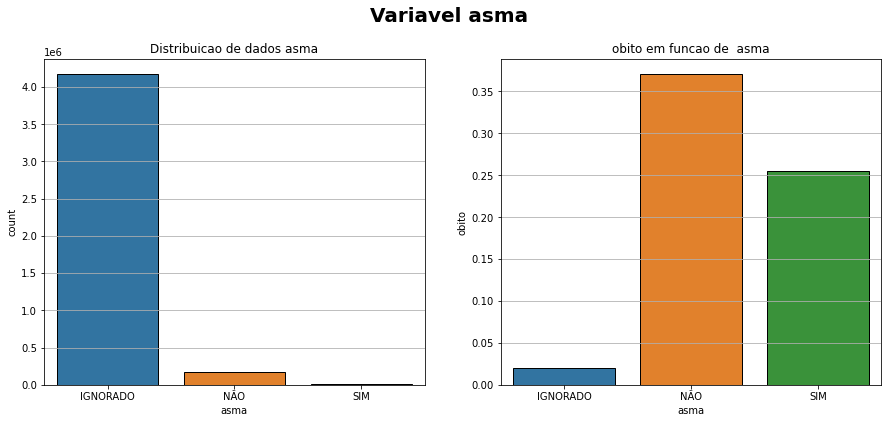

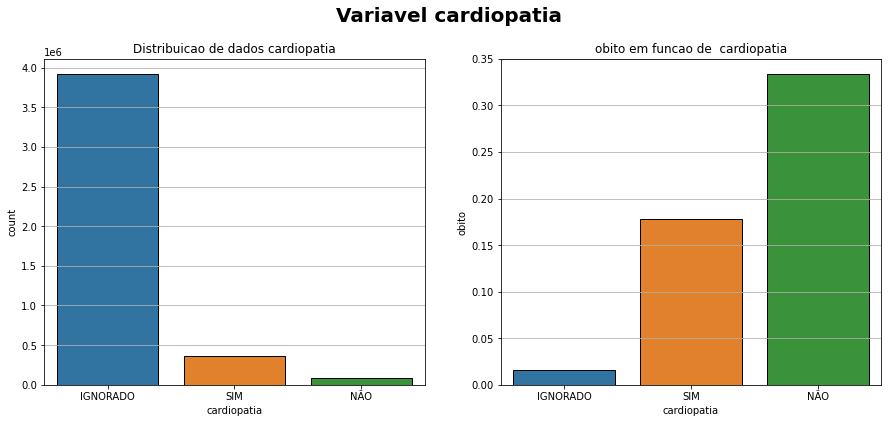

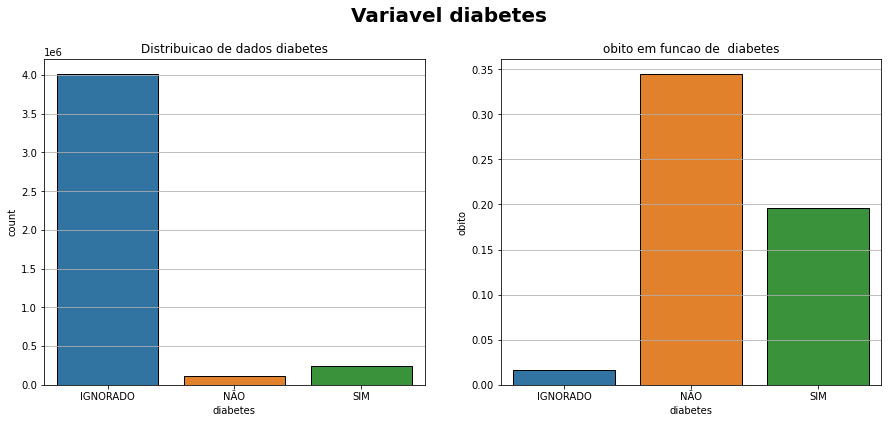

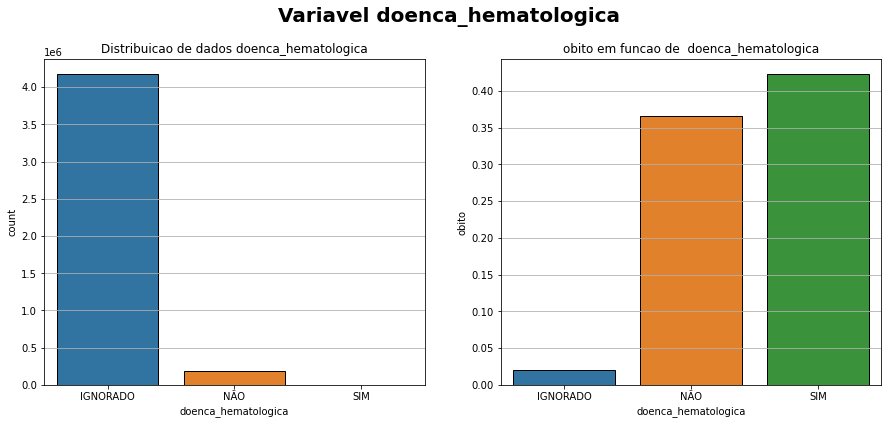

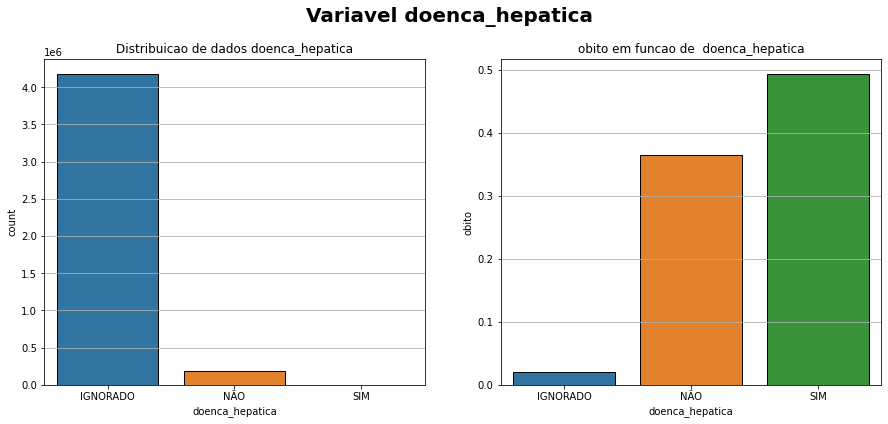

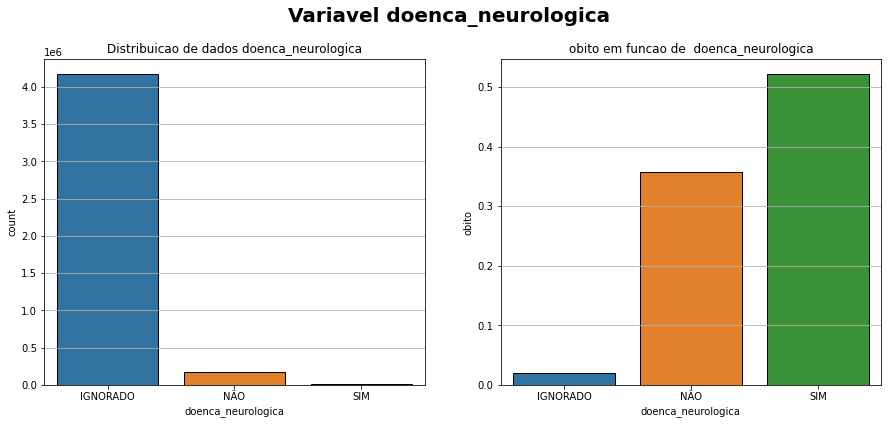

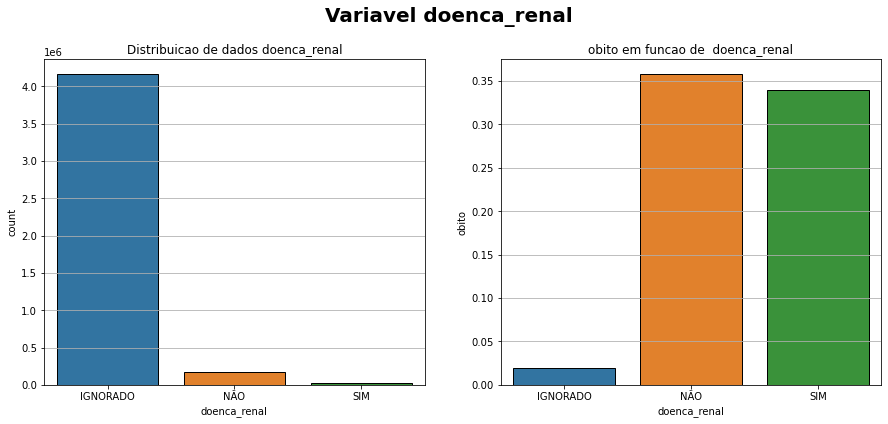

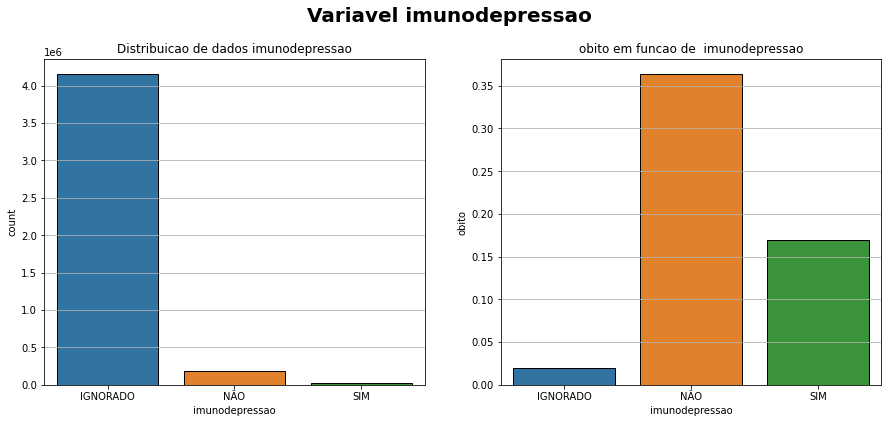

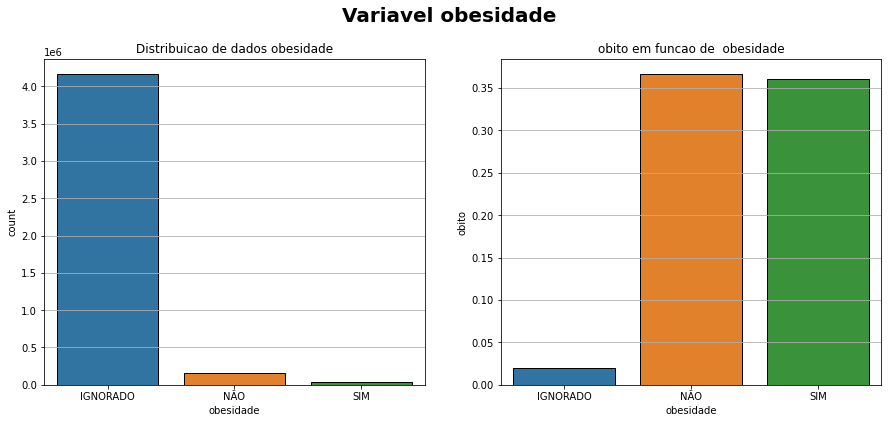

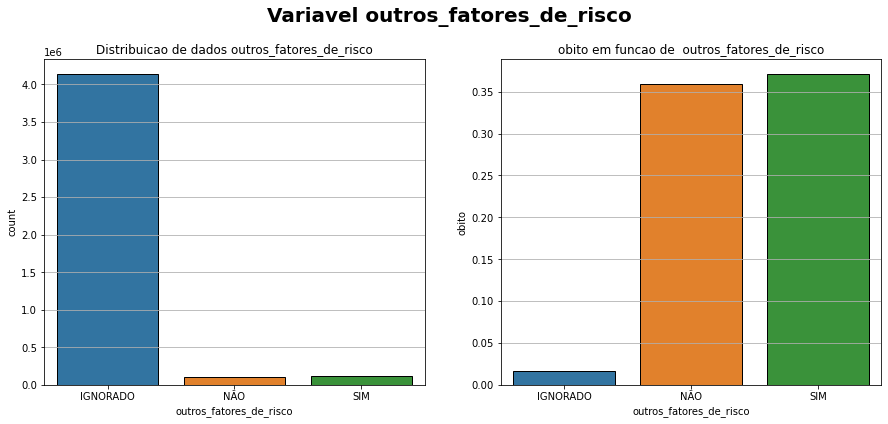

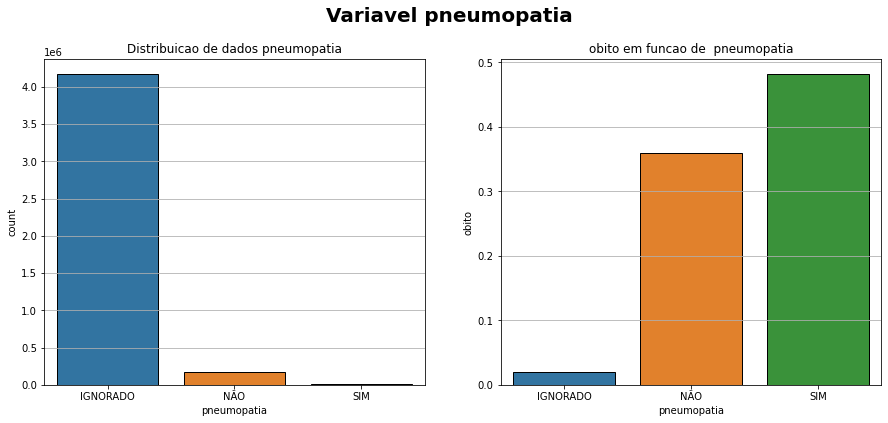

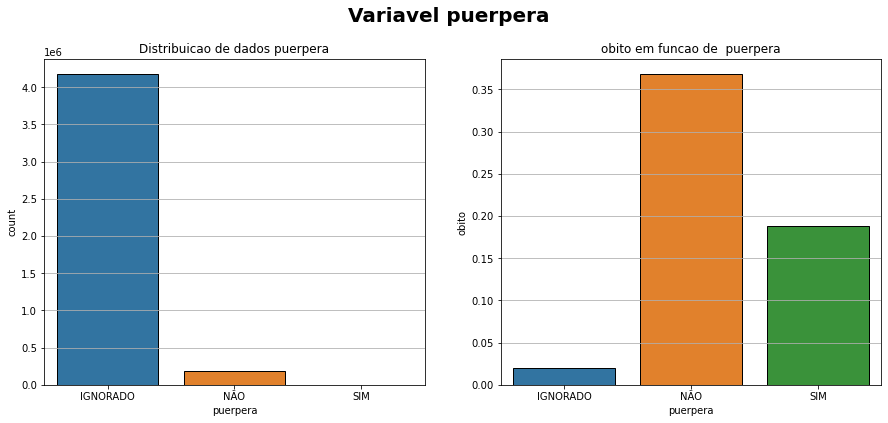

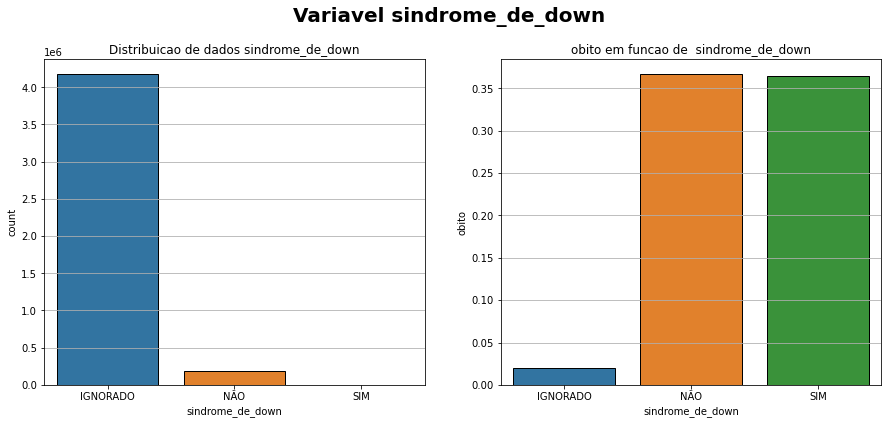

In [5]:
EDA_graphs(df_nonan,disc_cols,cont_cols,target)

# 4 - Geoespacial

In [46]:
# Download all municipalities of Rio
all_muni = geobr.read_municipality(code_muni="SP", year=2010)

# agrupar os obitos por municipio do estado de são paulo
df_obitos_muni = df_nonan[['nome_munic','codigo_ibge','obito']].groupby(by='codigo_ibge',as_index=False).sum()

# join the databases
all_muni = all_muni.merge(df_obitos_muni, how="left", left_on="code_muni", right_on="codigo_ibge")

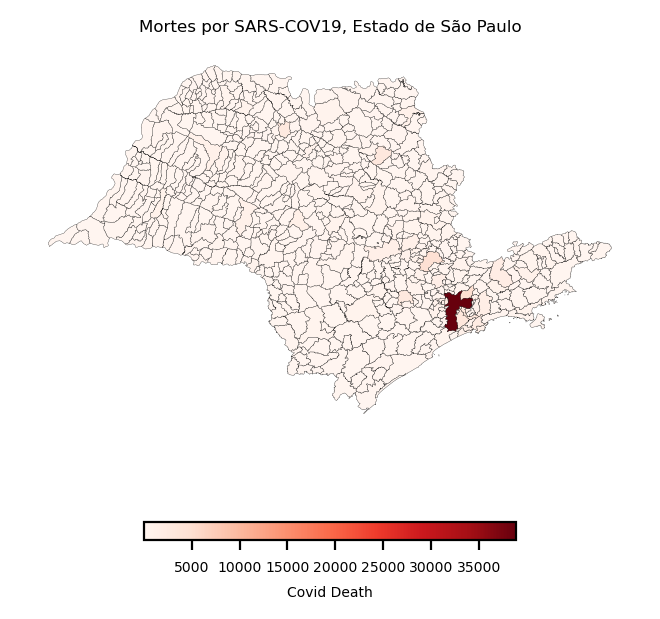

In [67]:
# Mortes por SARS-COV19, nas cidades do estado de São Paulo
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

all_muni.plot(
    column="obito",
    cmap="Reds",
    legend=True,
    legend_kwds={
        "label": "Covid Death",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    edgecolor="black",
    linewidth=0.1,
    ax=ax,
)

ax.set_title("Mortes por SARS-COV19, Estado de São Paulo")
ax.axis("off")
fig.savefig('figs/obitos_municipio.png')
fig.show()

- mortes por mil habitantes 
- renda/escolaridade/saneamento/basico

variaveis exogenas pelos codigos do municipio
- variaveis socioeconomicas pelo ibge
- http://www.atlasbrasil.org.br/consulta
- ipeadata
- basedosdados

# 5 - conclusoes:


FORTE INFLUENCIA
* municipio, isso pode estar relacionado a ocupacao de hospitais ? outras politicas publicas de isolamento ?
* idade, a taxa de sobrevivencia de pessoas mais jovens é maior
* sexo, homens e ignorado tem uma maior chance de obito 
* cardiopatia
* doenca hematologica 
* doenca hepatica 
* doenca neurologica
* outros fatores de risco 
* pneumopatia é um fator de risco 

MODERADA INFLUENCIA
* doenca renal
* obesidade
* sindrome de down

FRACA INFLUENCIA
* asma
* diabetes
* imunodepressao, pessoas com habitos de saúde e higiene bastante rígidos
* puerpera

ANALISE TEMPORAL
* os obitos parecem diminuir com o passar dos meses 

# 6 - Referencias

[1] Panorama Populaciona do Etado de São Paulo. IBGE. Disponível em: <https://cidades.ibge.gov.br/brasil/sp/panorama>. Acesso em: 10 de Fev. de 2022
https://github.com/ipeaGIT/geobr
https://ipeagit.github.io/geobr/articles/python-intro/py-intro-to-geobr.html